<font color = "Red">**Data Description**

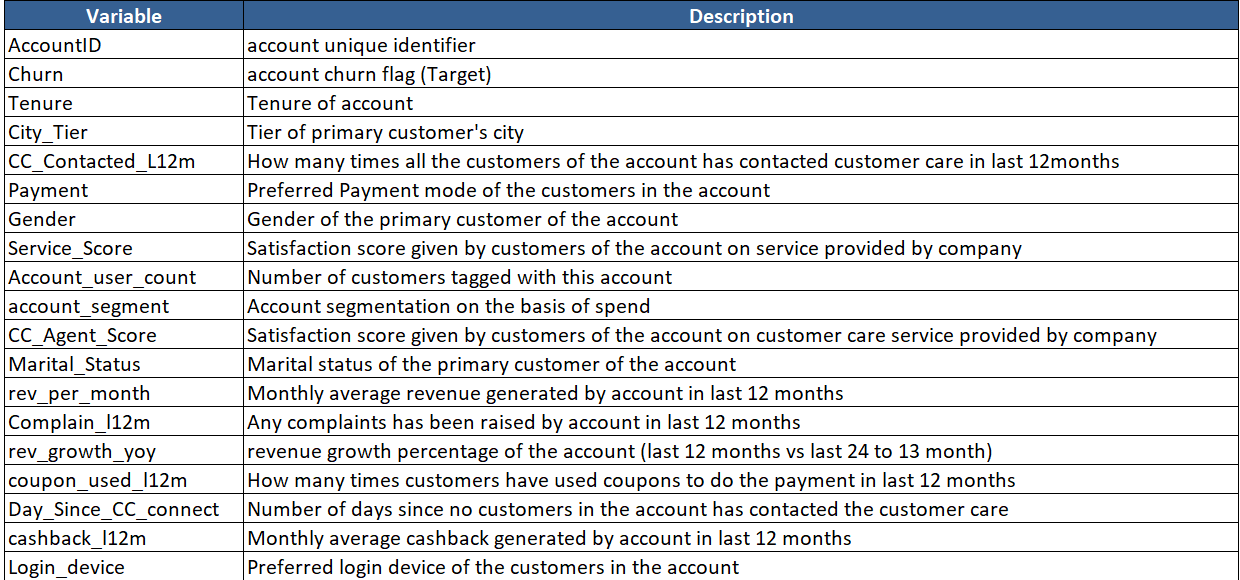

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## <font color = "Red"> <b> 2)Data Report
### <font color = "Red"> <b> 2.a) Understanding how data was collected in terms of time, frequency and methodology	 
 


### <font color = "Red"> <b> 2.b) Visual inspection of data (rows, columns, descriptive details)	

**Read the data**

In [2]:
from google.colab import files

In [3]:
import io
uploaded=files.upload()

Saving Customer+Churn+Data.xlsx to Customer+Churn+Data.xlsx


In [4]:
churn = pd.read_excel(io.BytesIO(uploaded["Customer+Churn+Data.xlsx"]),sheet_name="Data for DSBA")
churn.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [5]:
churn.shape

(11260, 19)

**Get the info**

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

**Check for Duplicates**

In [7]:
#Dropping "Account ID"
churn.drop('AccountID',inplace=True,axis=1)

**Get the Summary Statistics**

In [8]:
churn.describe(include='all')

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.000000,11158.0,11148.000000,11158.000000,11151,11152,11162.000000,11148.0,11163,11144.000000,11048,11158.0,10903.000000,11260.0,11260.0,10903.0,10789.00,11039
unique,NaN,38.0,NaN,NaN,5,4,NaN,7.0,7,NaN,3,59.0,NaN,20.0,20.0,24.0,5693.00,3
top,NaN,1.0,NaN,NaN,Debit Card,Male,NaN,4.0,Super,NaN,Married,3.0,NaN,14.0,1.0,3.0,155.62,Mobile
freq,NaN,1351.0,NaN,NaN,4587,6328,NaN,4569.0,4062,NaN,5860,1746.0,NaN,1524.0,4373.0,1816.0,10.00,7482
mean,0.168384,NaN,1.653929,17.867091,NaN,NaN,2.902526,NaN,NaN,3.066493,NaN,NaN,0.285334,NaN,NaN,NaN,NaN,NaN
std,0.374223,NaN,0.915015,8.853269,NaN,NaN,0.725584,NaN,NaN,1.379772,NaN,NaN,0.451594,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,4.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,1.000000,11.000000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,1.000000,16.000000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,0.000000,NaN,3.000000,23.000000,NaN,NaN,3.000000,NaN,NaN,4.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


####  <font color = "Black"> - Percentile values of most of the variables suggest presence of NaN values, indicating Data has lot of missing values which may need further treatment basis their data types.
####  <font color = "Black"> - Mean and Median values of all the variables have fair differences, which indicates data must be skewed.
#### <font color = "Black">- Values of Max values, Min Values compared to 75% and 25%, indicates high number of outliers.
#### <font color = "Black">- Some of the continuous variables is found to be of 'object datatype, suggesting presence of unwanted variables,
#### <font color = "Black">- Gender column is supposed to have only 2 variables, but value count suggest of 4 unique values, suggesting posible renaming of some of the values
#### <font color = "Black">- Lets check for null values, duplicate values, outliers and skewness.

**Check for Null Values**

In [9]:
churn.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### <font color= "Green"> There are lot of null values in the given dataset




Check for Unique values

In [10]:
for feature in churn.columns:
    if churn[feature].dtype == 'object':
        print(feature)
        print(churn[feature].unique())
        print('\n')

Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]


Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' 'F' nan 'M']


Account_user_count
[3 4 nan 5 2 '@' 1 6]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']


Marital_Status
['Single' 'Divorced' 'Married' nan]


rev_per_month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101
 136 125 14 13 12 115 23 122 117 131 104 15 25 135 111 109 100 103]


rev_growth_yoy
[11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26 '$' 4 27 28]


coupon_used_for_payment
[1 0 4 2 9 6 11 7 12 10 5 3 13 15 8 '#' '$' 14 '*' 16]


Day_Since_CC_connect
[5 0 3 7 2 1 8 6 4 15 nan 11 10 9 13 12 17 16 14 30 '$' 46 18 31 47]


cashback
[159.93 120.9 nan ... 227.36 226.91 191.42]


Login_device
['Mobile' 'Compu

In [11]:
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

### <font color = "Red"> <b> 2.c) Understanding of attributes (variable info, renaming if required)

In [12]:
churn['Gender']= churn['Gender'].replace({'M':'Male', 'F':'Female'})
churn['account_segment']=churn['account_segment'].replace({'Regular +':'Regular Plus', 'Super +':'Super Plus'})


### <font color = "Red"> <b>3.a) Removal of unwanted variables (if applicable)

In [13]:
feature=churn.select_dtypes(include=['object']).columns
for i in range(0,len(feature)):
  churn[feature[i]]= churn[feature[i]].replace({'@':np.nan,'#':np.nan,'+':np.nan,'$':np.nan,'*':np.nan,'&&&&':np.nan})
    

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [15]:
for feature in churn.columns:
    if churn[feature].dtype == 'object':
        print(feature)
        print(churn[feature].unique())
        print('\n')

Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' nan]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' nan 'Super Plus']


Marital_Status
['Single' 'Divorced' 'Married' nan]


Login_device
['Mobile' 'Computer' nan]




### <font color = "Red"> <b> Description of data without null values (New Data Set only for description purpose)

In [16]:
churn_nonull=churn.copy()


In [17]:
churn_nonull.dropna(axis=0,inplace=True)


In [18]:
churn_nonull.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,8249.0,NaN,NaN,NaN,0.166808,0.372827,0.0,0.0,0.0,0.0,1.0
Tenure,8249.0,NaN,NaN,NaN,11.410959,14.020332,0.0,2.0,9.0,16.0,99.0
City_Tier,8249.0,NaN,NaN,NaN,1.656928,0.916567,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,8249.0,NaN,NaN,NaN,17.866529,8.924066,4.0,11.0,16.0,23.0,132.0
Payment,8249,5,Debit Card,3423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,8249,2,Male,4977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,8249.0,NaN,NaN,NaN,2.90314,0.727025,0.0,2.0,3.0,3.0,5.0
Account_user_count,8249.0,NaN,NaN,NaN,3.695721,1.032349,1.0,3.0,4.0,4.0,6.0
account_segment,8249,5,Regular Plus,3045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,8249.0,NaN,NaN,NaN,3.062311,1.379142,1.0,2.0,3.0,4.0,5.0


## <font color = "Red"> <b>3) Exploratory data analysis

### <font color = "Red"> <b>3.a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)
####   <font color='Red'> <b>Uni-variate analysis

In [19]:
churn.select_dtypes(exclude=['object']).columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback'],
      dtype='object')

In [20]:
# Lets import random colors list for plotting 
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0,0xFFFFFF),range(n)))
color_list=get_colors(13)
color_list

['#f5e5f5',
 '#0f3ac3',
 '#722224',
 '#04a31f',
 '#4d7301',
 '#b9c316',
 '#bfd3fa',
 '#eab410',
 '#48315d',
 '#b828cf',
 '#700620',
 '#6f3cbc',
 '#482080']

In [21]:
churn.select_dtypes(exclude=['object']).columns.size

13

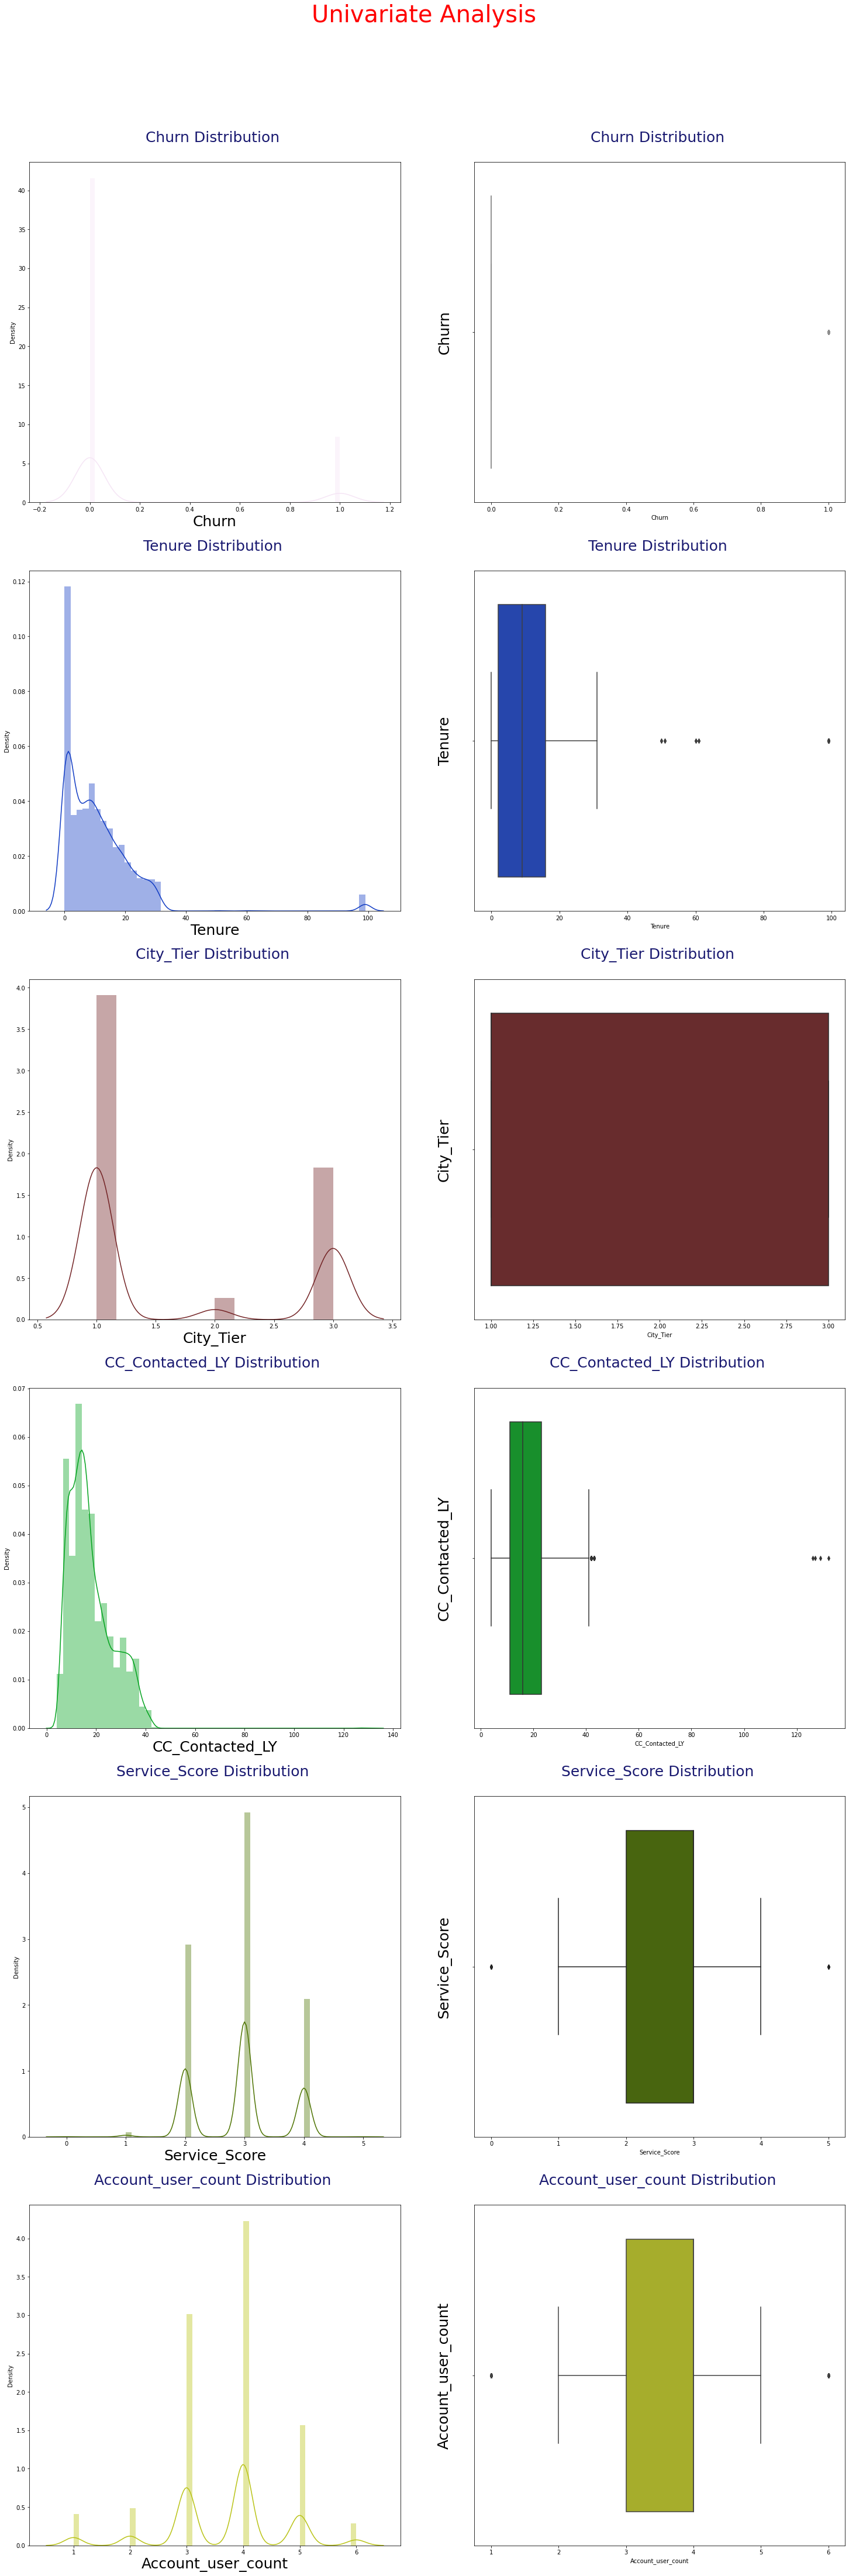

In [22]:
var1=churn.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(nrows=6,ncols=2)
n=churn.select_dtypes(exclude=['object']).columns.size
fig.set_size_inches(25, 75);
plt.suptitle('Univariate Analysis',fontsize=40, color='Red',y=0.93);
for i in range(0,6):
    a = sns.distplot(churn[var1].iloc[:,i] , ax=axes[i][0],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_xlabel(var1[i],fontsize=25)
    a = sns.boxplot(churn[var1].iloc[:,i] , orient = "v" , ax=axes[i][1],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_ylabel(var1[i]+'\n',fontsize=25);

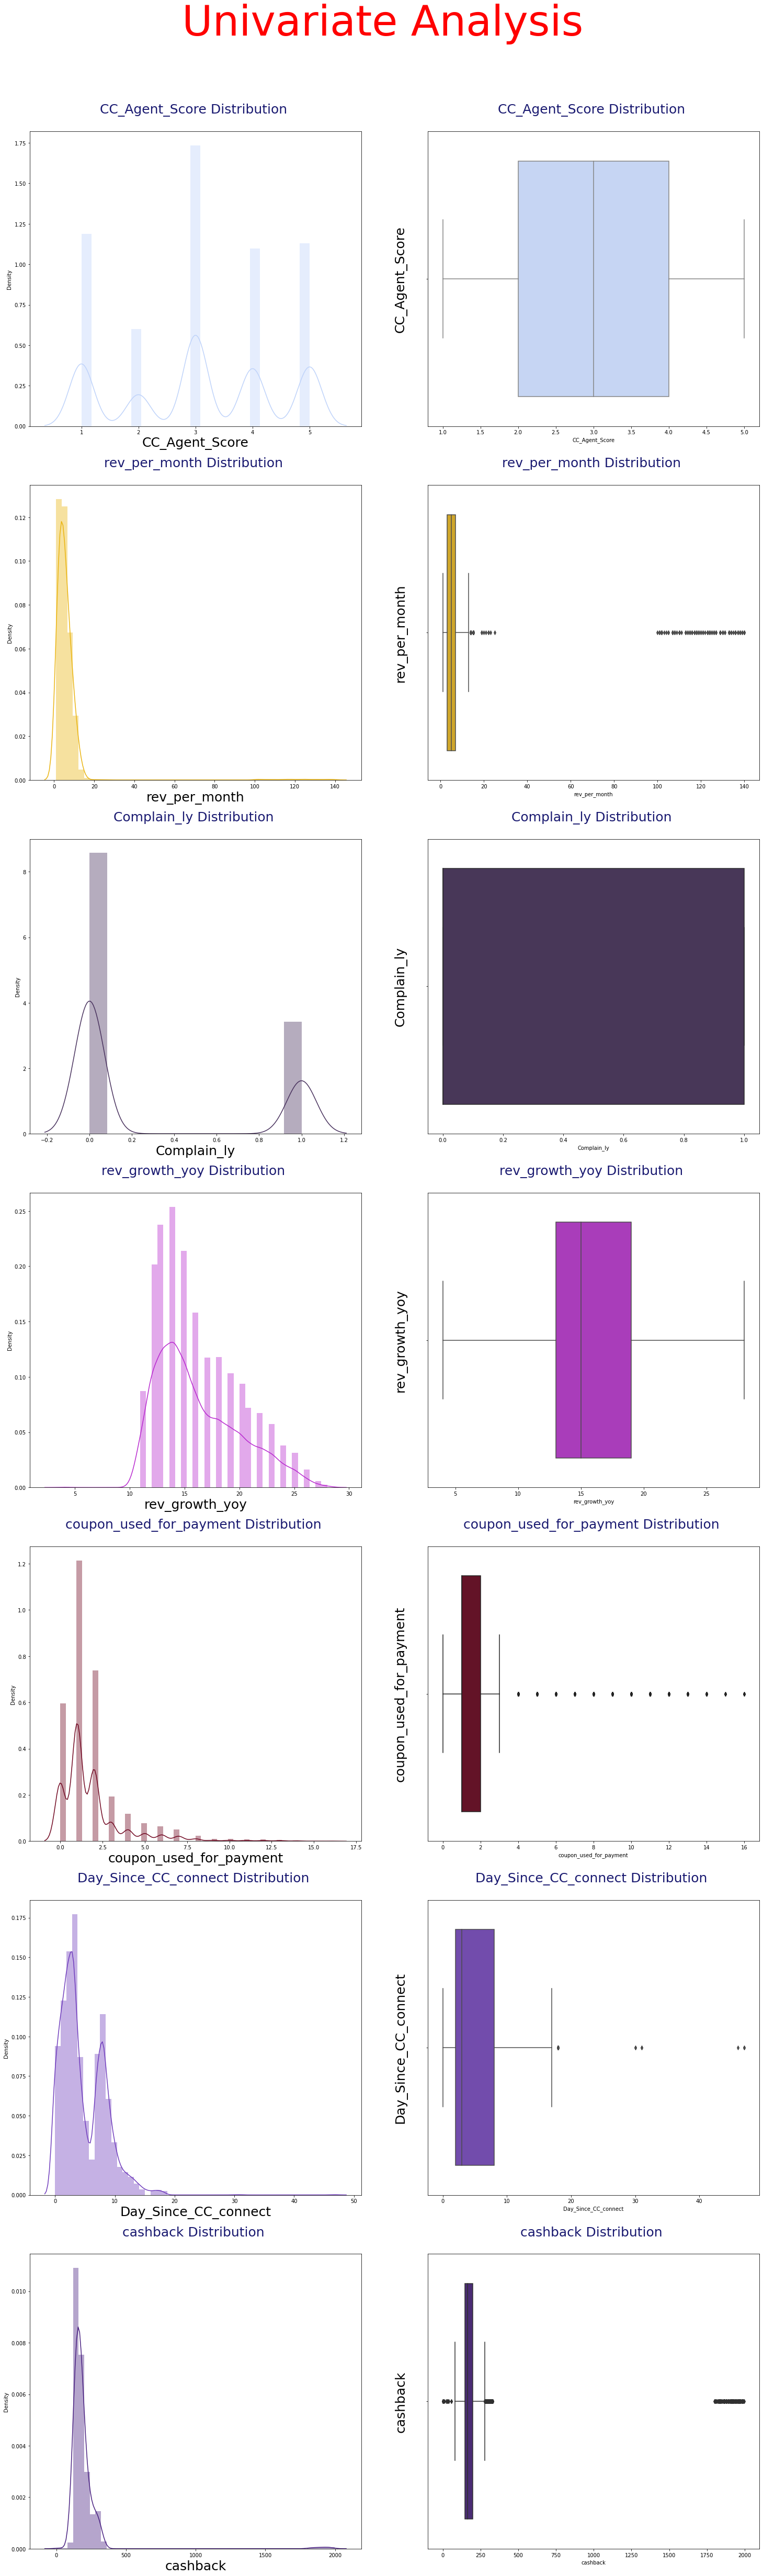

In [23]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25, 85);
plt.suptitle('Univariate Analysis',fontsize=80, color='Red',y=0.92);
for i in range(6,n):
    a = sns.distplot(churn[var1].iloc[:,i] , ax=axes[i-6][0],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_xlabel(var1[i],fontsize=25);
    a = sns.boxplot(churn[var1].iloc[:,i] , orient = "v" , ax=axes[i-6][1],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_ylabel(var1[i]+"\n",fontsize=25);

In [24]:
churn.skew()

Churn                      1.772606
Tenure                     3.895707
City_Tier                  0.737107
CC_Contacted_LY            1.422977
Service_Score              0.003891
Account_user_count        -0.393100
CC_Agent_Score            -0.142149
rev_per_month              9.093909
Complain_ly                0.950876
rev_growth_yoy             0.752474
coupon_used_for_payment    2.575199
Day_Since_CC_connect       1.273021
cashback                   8.770766
dtype: float64

### <font color = "Sky Blue"> - We observe from the plots that the variables 'Tenure', ,'CC_Contacted_LY', 'Service_Score','Account_user_count', 'rev_per_month','rev_growth_yoy', coupon_used_for_payment', 'Day_Since_CC_connect','cashback' have outliers

### <font color = "Sky Blue"> - Also the data in case of all variables are skewed, in either direction

### <font color = "Sky Blue"> - Data in its original form may not follow normal distribution

### <font color = "Red"> <b>3.b) Bivariate analysis (relationship between different variables , correlations)
####   <font color='red'><b> Multi  - Variate Analysis:

In [25]:
# Check for correlation of variable
churn.corr(method='pearson')

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
Churn,1.000000,-0.233150,0.084135,0.072071,0.008991,0.107292,0.105796,0.022538,0.251488,-0.013877,-0.014826,-0.147956,-0.032382
Tenure,-0.233150,1.000000,-0.030223,-0.004261,0.009608,-0.004052,-0.020031,0.028431,-0.021419,0.018824,0.089171,0.122612,0.078416
City_Tier,0.084135,-0.030223,1.000000,0.011835,-0.006443,0.025498,-0.011479,-0.028521,0.002478,-0.030025,0.021124,0.023158,0.010516
CC_Contacted_LY,0.072071,-0.004261,0.011835,1.000000,0.060052,0.020351,-0.000209,0.015675,0.027244,0.072913,0.004969,0.012938,0.002679
Service_Score,0.008991,0.009608,-0.006443,0.060052,1.000000,0.323327,0.032135,0.026691,0.002643,0.103374,0.181914,0.099770,0.042961
Account_user_count,0.107292,-0.004052,0.025498,0.020351,0.323327,1.000000,-0.017522,0.020600,0.003411,0.067616,0.146081,0.037573,0.037057
CC_Agent_Score,0.105796,-0.020031,-0.011479,-0.000209,0.032135,-0.017522,1.000000,0.022167,-0.031459,-0.027159,0.030661,0.030808,-0.012599
rev_per_month,0.022538,0.028431,-0.028521,0.015675,0.026691,0.020600,0.022167,1.000000,-0.002262,0.024114,0.016548,-0.000923,0.002974
Complain_ly,0.251488,-0.021419,0.002478,0.027244,0.002643,0.003411,-0.031459,-0.002262,1.000000,-0.005122,-0.007023,-0.041111,0.008734
rev_growth_yoy,-0.013877,0.018824,-0.030025,0.072913,0.103374,0.067616,-0.027159,0.024114,-0.005122,1.000000,0.018341,0.002206,-0.001157


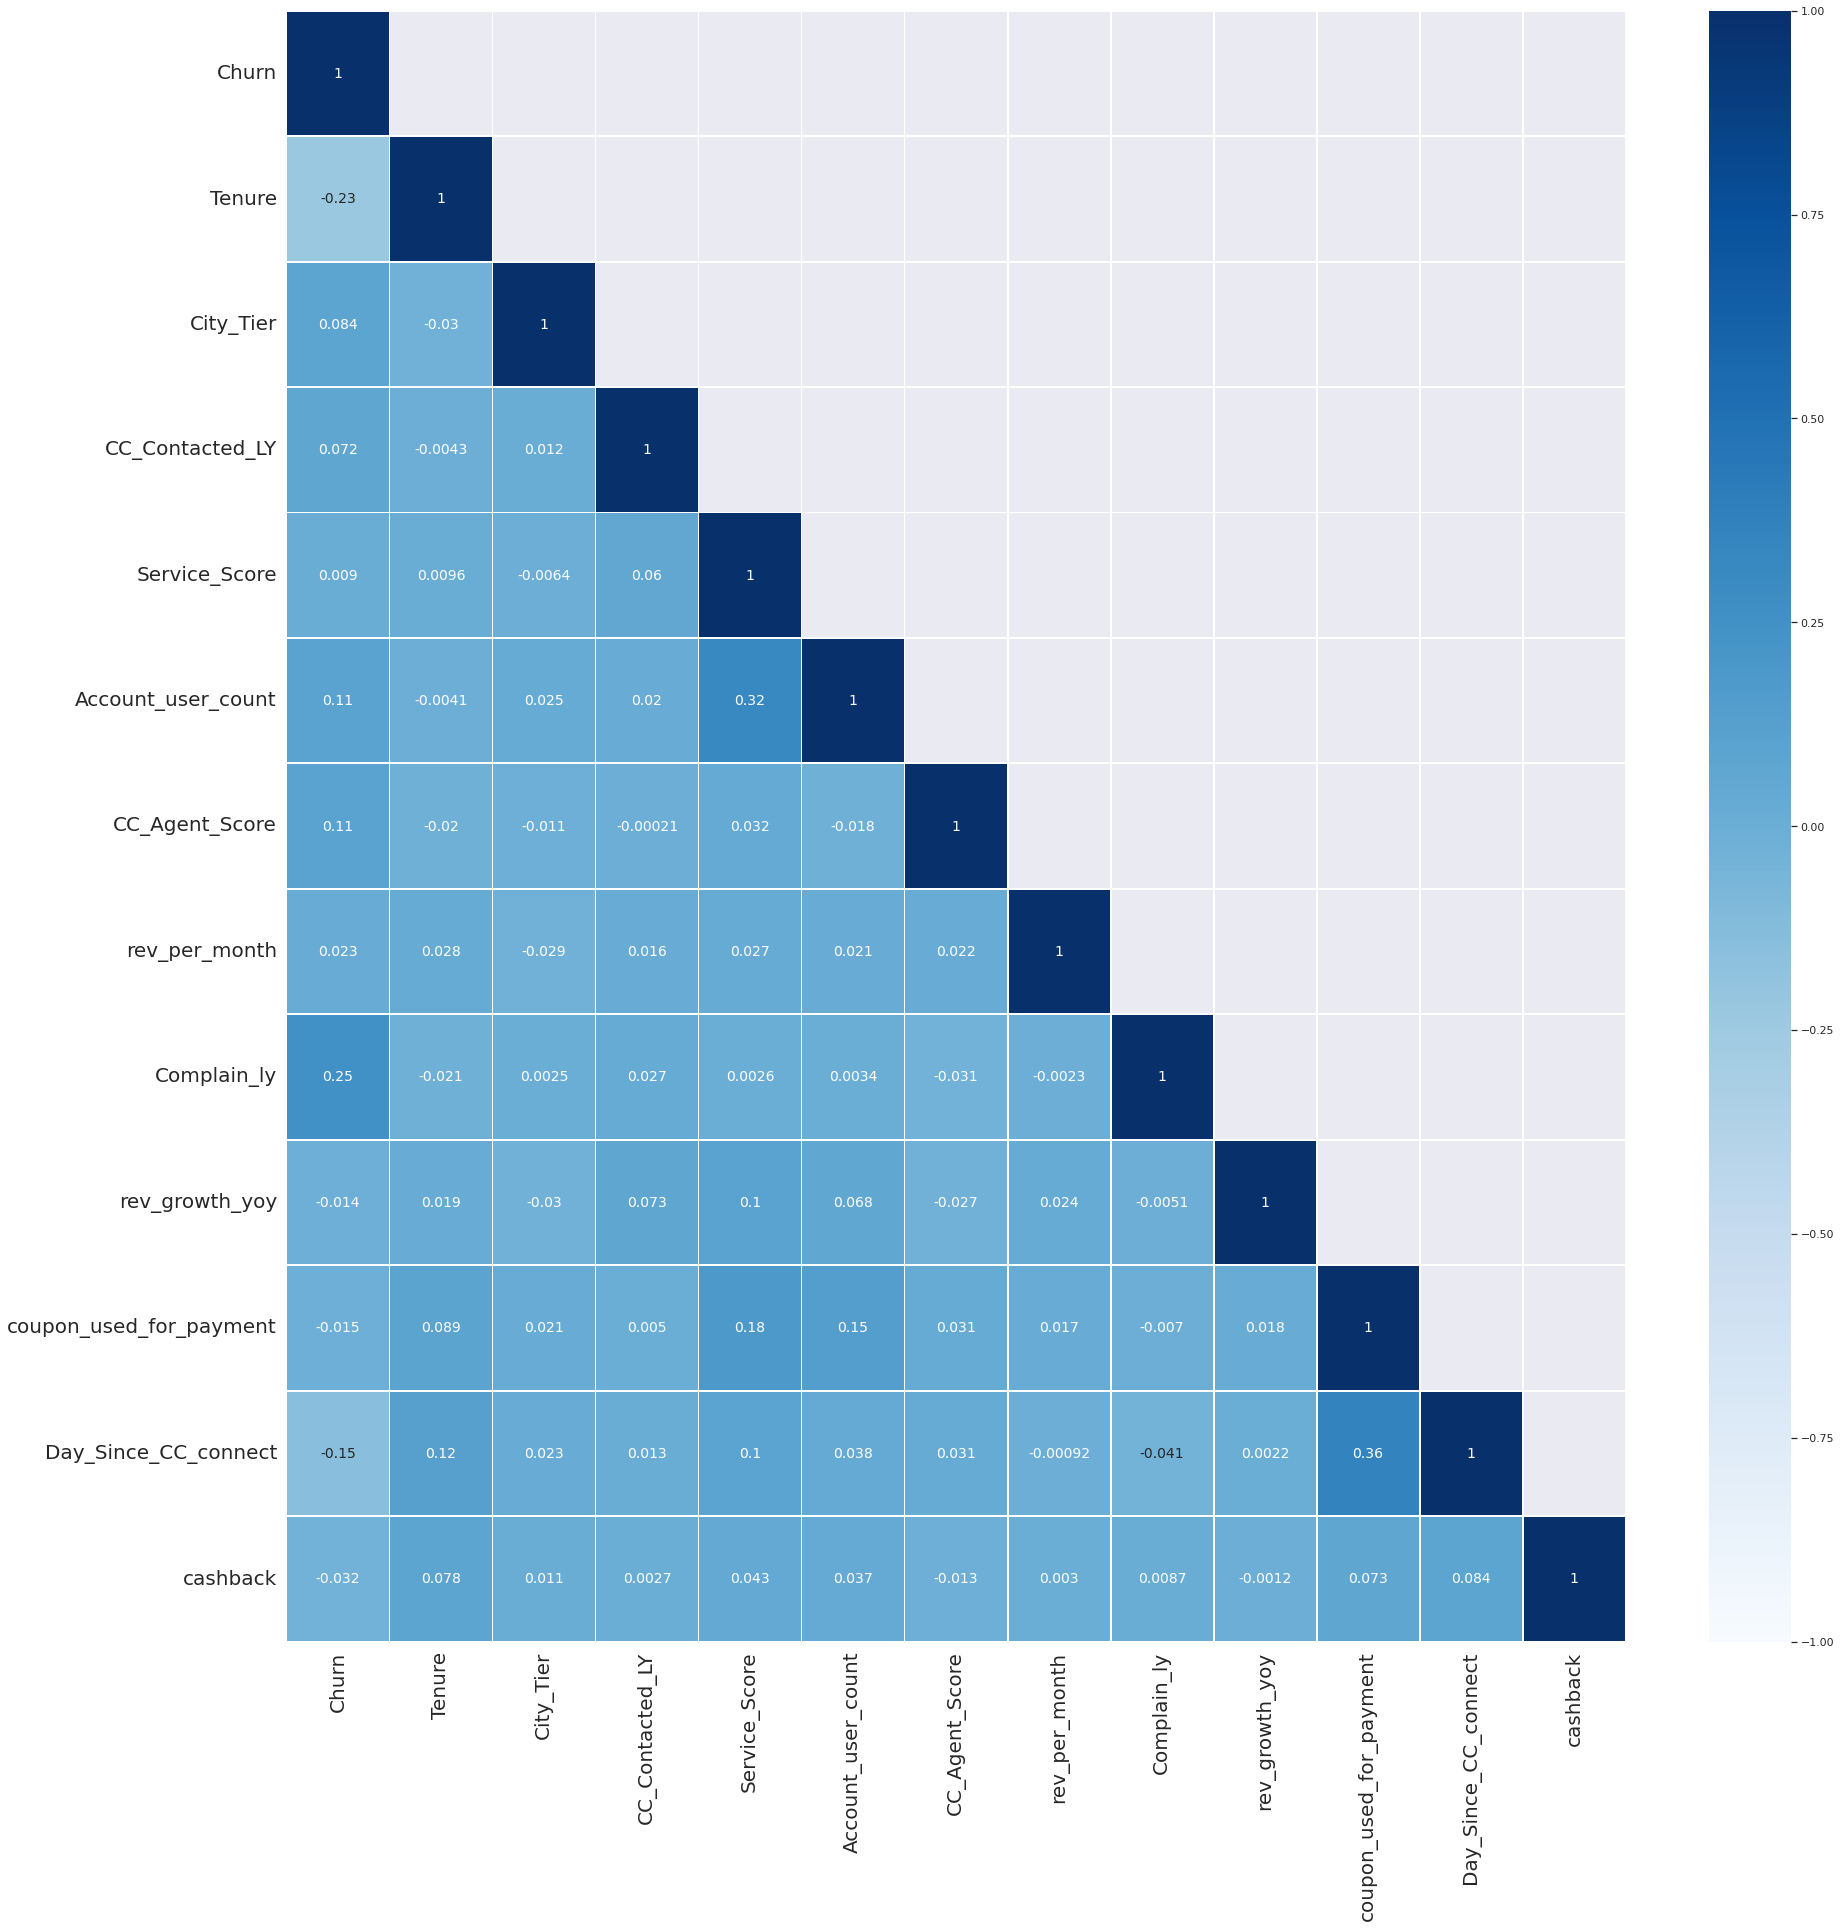

In [28]:
cor = churn.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(30,30))
sns.set(font_scale=1)
sns.heatmap(cor, mask = mask, annot = True,annot_kws={"size": 14},linewidths=0.9,
            linecolor='White',cmap='Blues', vmin = -1, vmax = 1);
plt.yticks(fontsize="20",va='center');
plt.xticks(fontsize="20",ha='center');

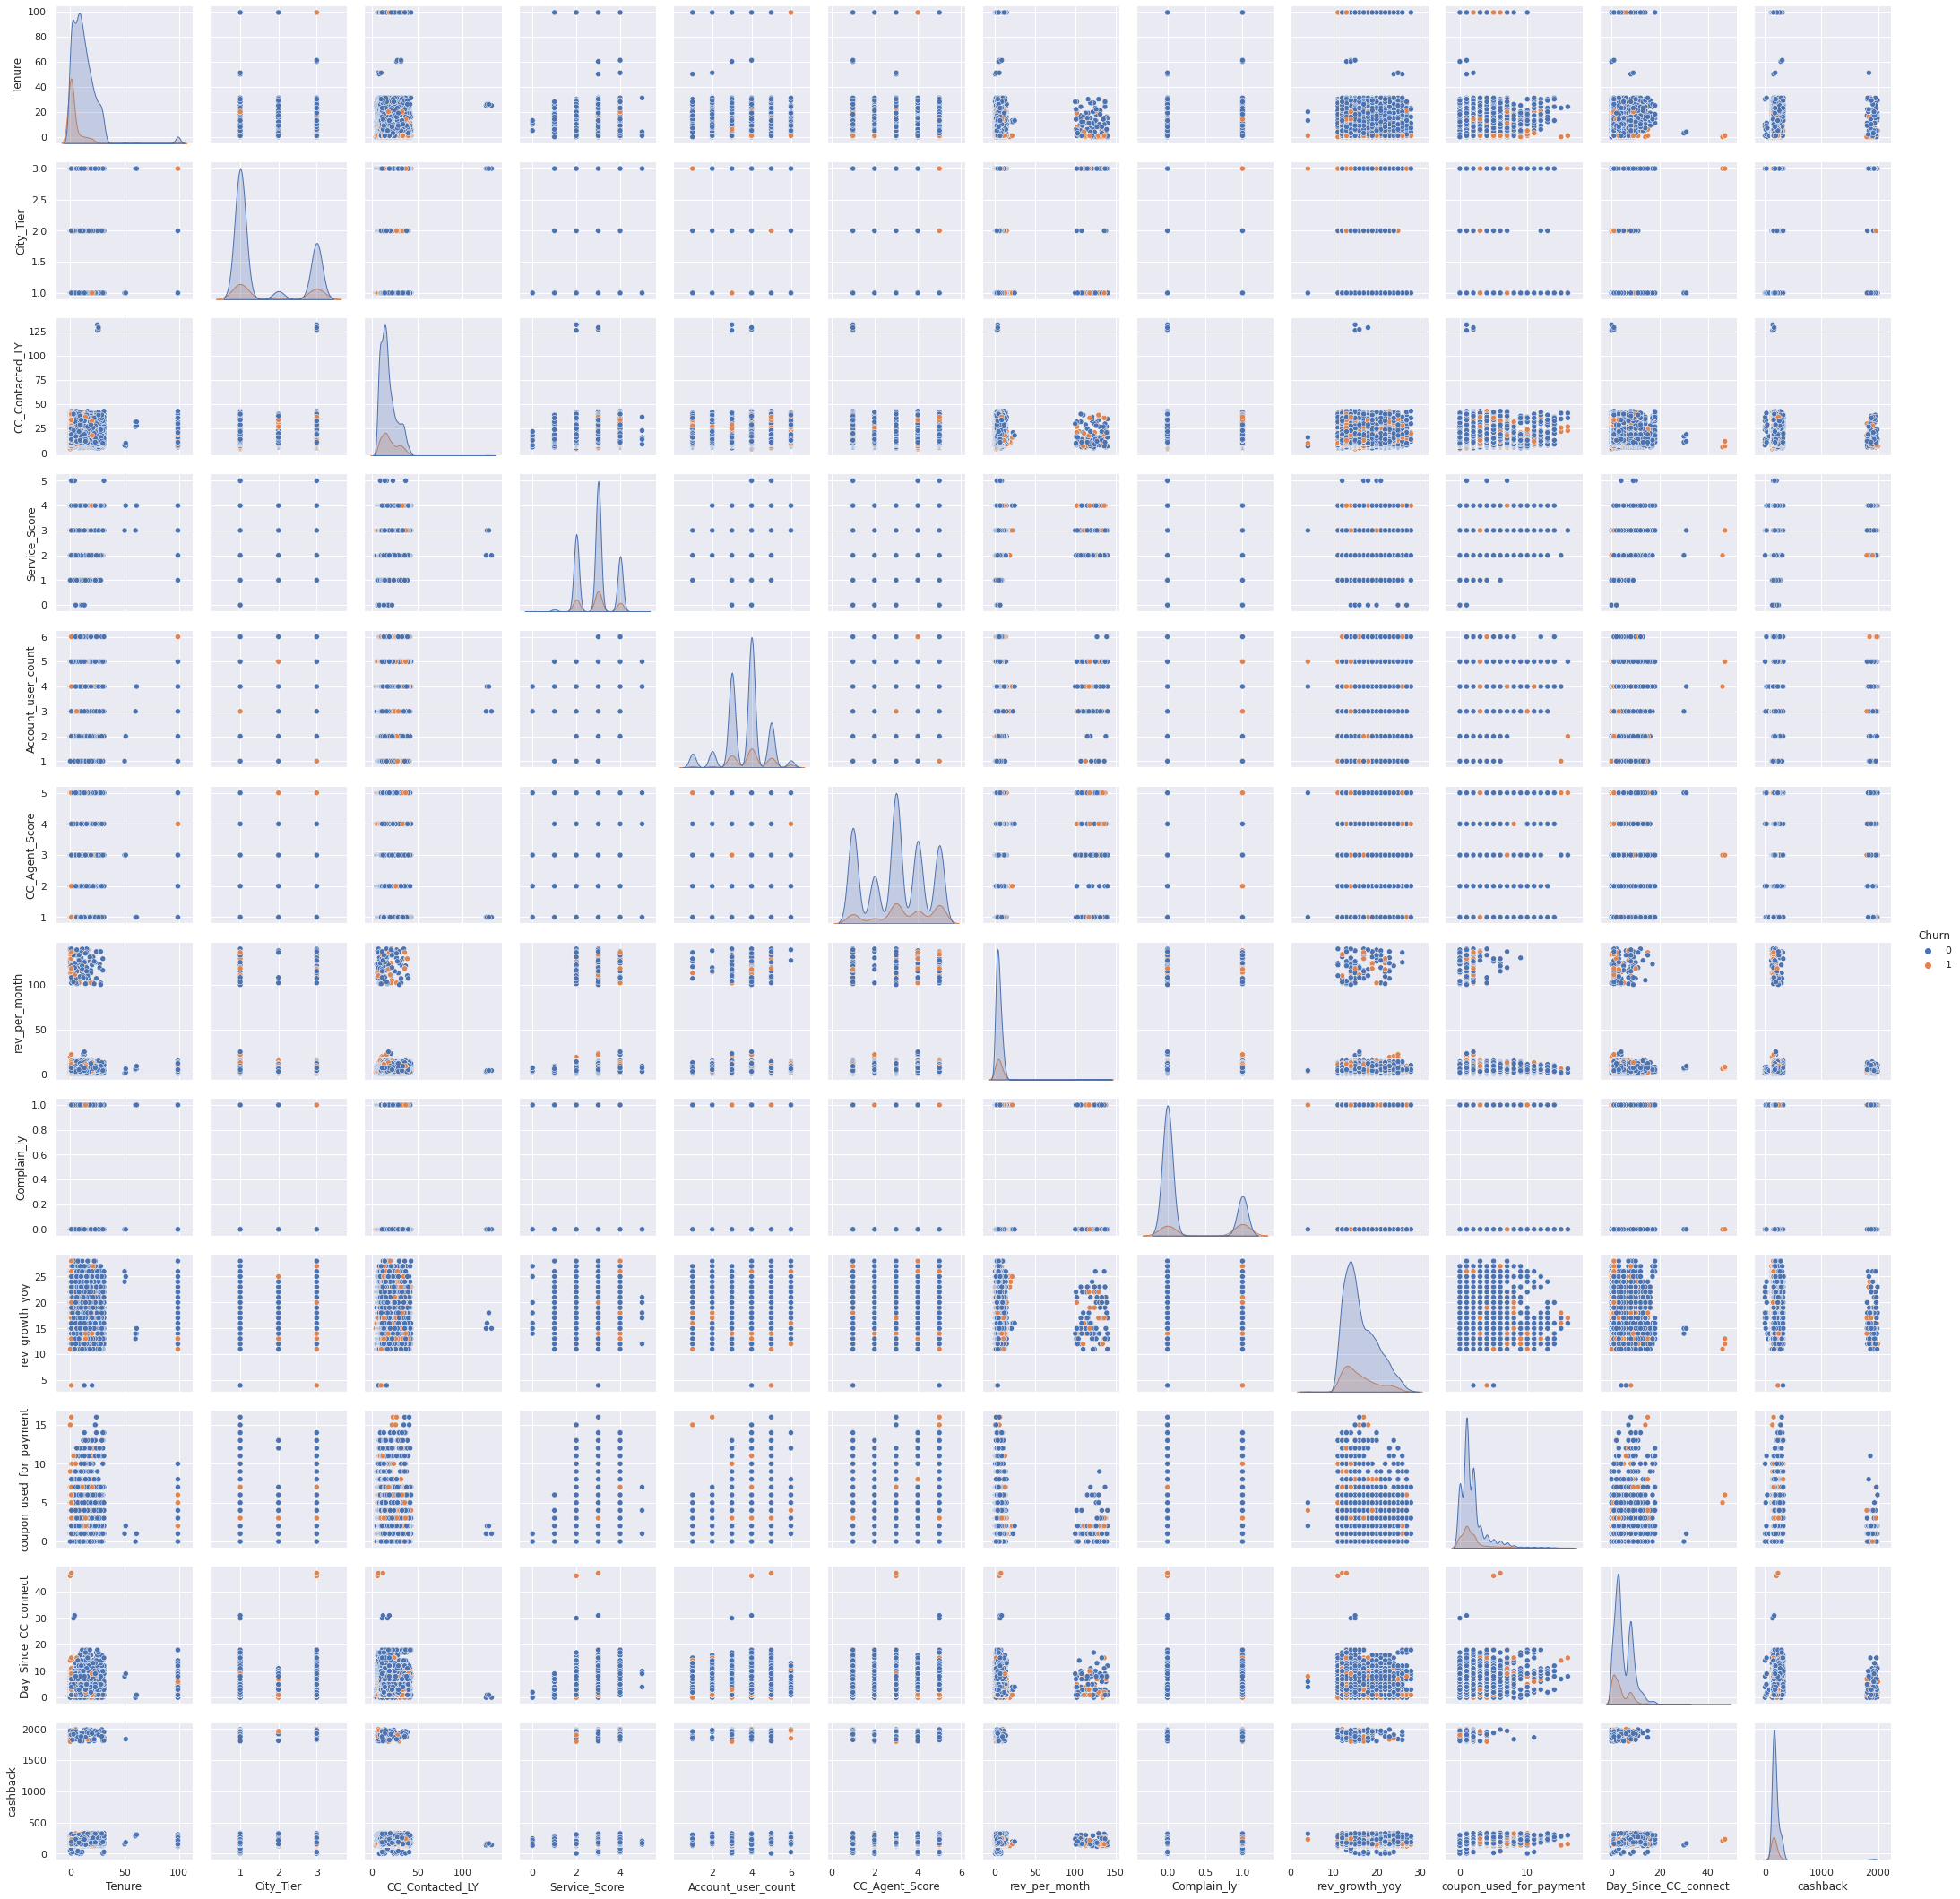

In [29]:
sns.pairplot(churn,hue="Churn", diag_kind='kde',);

### <font color="Green"> ** Independent features among each other shows very less collinearity 




####   <font color='Black'> <b>Bi- Variate Analysis of Target variable with Independent Features

####   <font color='Red'> <B> Churn vs City_Tier

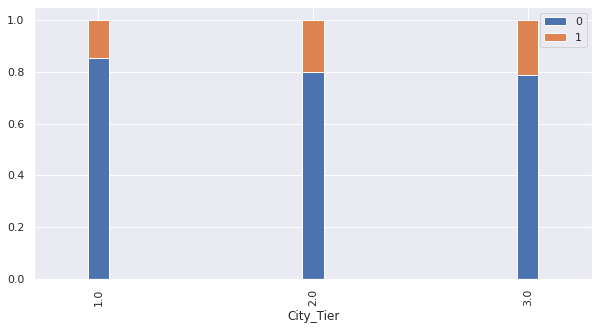

In [30]:
df= churn.groupby('City_Tier')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');

### <font color="Black"><i>The consumers belonging to Tier 1 cities churns less compared to Tier 2 and Tier 3 cities. The Tier 3 cities show the maximum impact in churn ratio, possibly, due to the lack of infrastructure development and customer service delays and may be preferring the traditional local owned cable operators to DTH connections.

####   <font color='Red'> <B> Churn vs CC_Contacted_LY

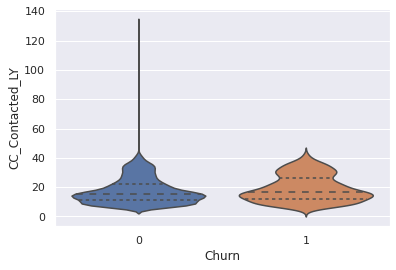

In [31]:
sns.violinplot(churn['Churn'],churn['CC_Contacted_LY'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Black"><i>The consumers who have contacted Customer care in around 35 or more time seems to be churning more. However above feature does not suggest significant difference pattern of churning among customers with those who do not churn

####   <font color='Red'> <B> Churn vs Payment

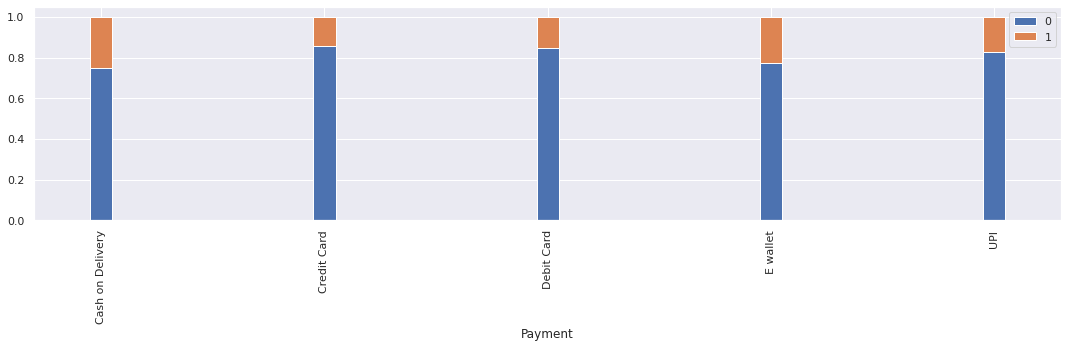

In [32]:
df1= churn.groupby('Payment')['Churn'].value_counts(normalize=True).unstack('Churn')
df1.plot.bar(stacked=True,figsize=(15,5), width=0.1)
plt.tight_layout()
plt.legend(loc='upper right');

### <font color="Black"><i>The consumers with payment modes ‘Cash On Delivery’ and ‘E wallet’ have churned inflated more than the ones using ‘Credit/Debit Cards’ and ‘UPI’. This signifies that the consumers using ‘Credit/Debit Cards’ and ‘UPI’ have had the privilege of cashback offers and points added post each transactions whereas the other two payment mode does not offer any kind of monetary benefit.

####   <font color='Red'> <B> Churn vs Gender

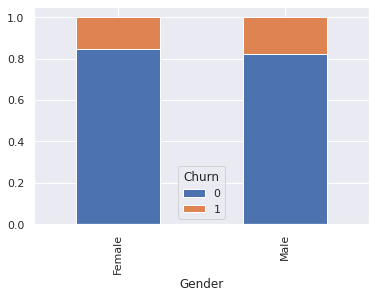

In [33]:
df1= churn.groupby('Gender')['Churn'].value_counts(normalize=True).unstack('Churn')
df1.plot.bar(stacked=True)

### <font color="Black"><i>There is not much significant difference in percentage of churning customers among both the genders.

####   <font color='Red'> <B> Churn vs Service_Score

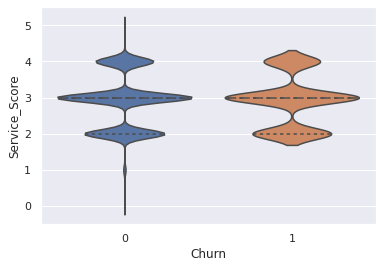

In [34]:
sns.violinplot(churn['Churn'],churn['Service_Score'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

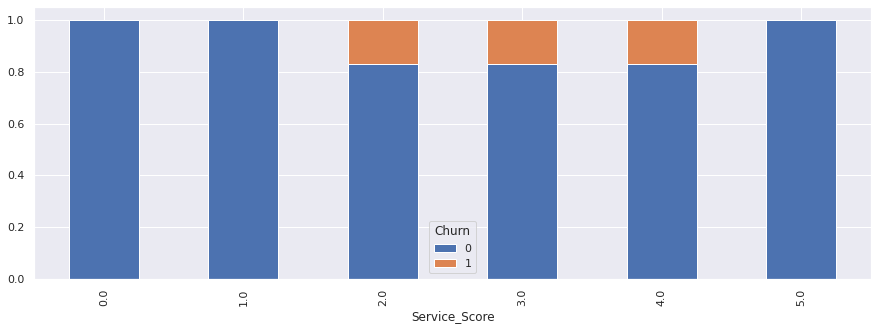

In [35]:
df= churn.groupby('Service_Score')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(15,5), width=0.5);

### <font color="Black"><i>The consumers who have rated the service score from 2.0 – 4.0 are the ones who are more likely to churn compared to the ones given the lowest rating. The consumers with medium satisfaction rate might have been the ones having high contact ratio and the service score rates have been aggregated.

####   <font color='Red'> <B> Churn vs Account_user_count

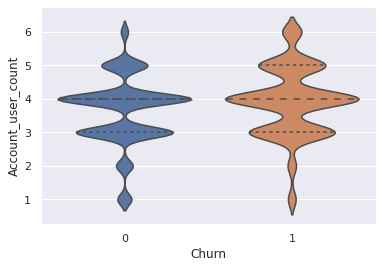

In [36]:
sns.violinplot(churn['Churn'],churn['Account_user_count'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

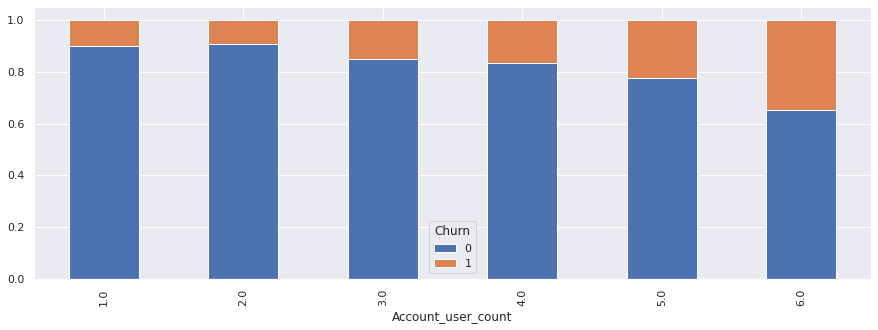

In [37]:
df= churn.groupby('Account_user_count')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(15,5), width=0.5);

### <font color="Black"><i>The churn proportion can be seen higher in case of 6 users for a single account which indicates that the account might be shared by friends/relatives dividing the monetary expense in return and common scenarios have been observed that shared accounts get dissolved easily due to personal clashes, financial factors and others.

####   <font color='Red'> <B> Churn vs account_segment

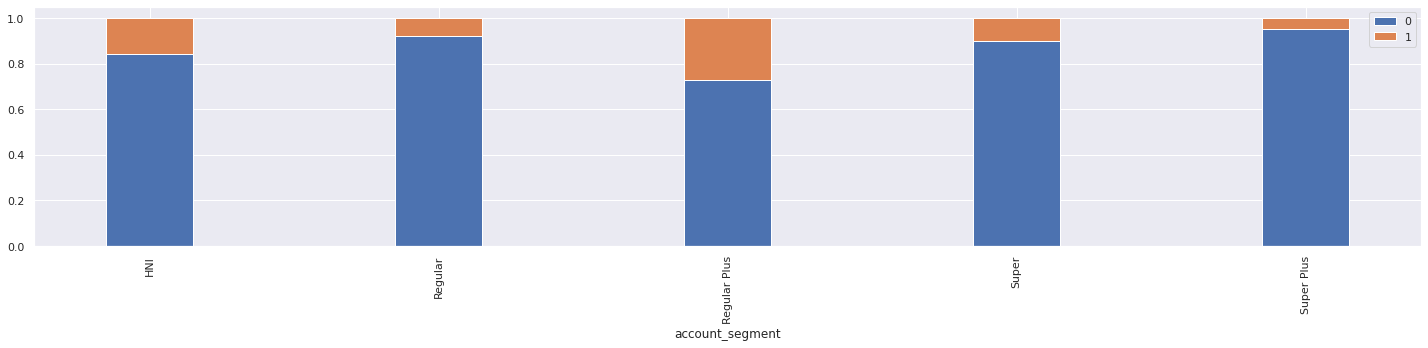

In [38]:
df= churn.groupby('account_segment')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(20,5), width=0.3)
plt.tight_layout()
plt.legend(loc='upper right');

### <font color="Black"><i>The customers using Regular Plus accounts seem to be churning more among others, possibly due to inadequate feature when compared to premiums

####   <font color='Red'> <B> Churn vs CC_Agent_Score

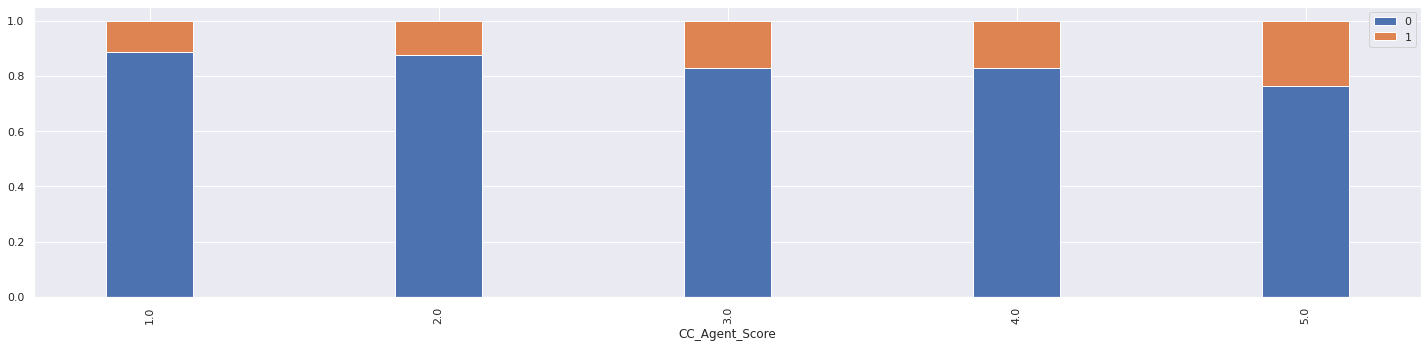

In [39]:
df= churn.groupby('CC_Agent_Score')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(20,5), width=0.3)
plt.tight_layout()
plt.legend(loc='upper right');

### <font color="Green"><i>

####   <font color='Red'> <B> Churn vs Account_user_count

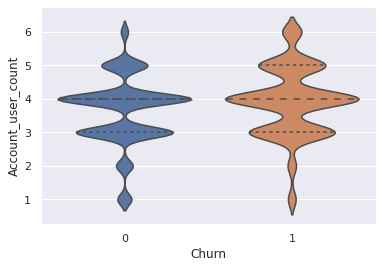

In [40]:
sns.violinplot(churn['Churn'],churn['Account_user_count'],inner='quartile',scale='width',orient='vertical',scale_hue=True)

####   <font color='Red'> <B> Churn vs Marital_Status

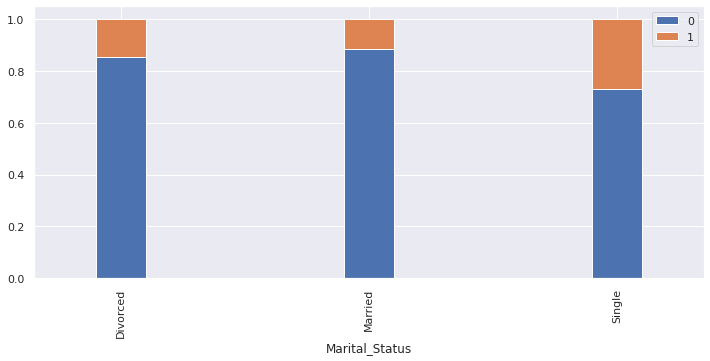

In [41]:
df= churn.groupby('Marital_Status')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(12,5), width=0.2)
plt.legend(loc="Upper Right")

### <font color="Black"><i>The consumers belonging to the ‘Single’ and ‘Divorced’ category of marital status have churned more compared to the married consumers. The ratio of churning is sky-high in single consumers, perhaps, due to the fact that this segment is inclining more towards OTT platforms rather than relying on DTH.

####   <font color='Red'> <B> Churn vs rev_per_month

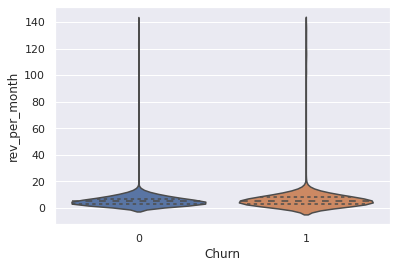

In [42]:
sns.violinplot(churn['Churn'],churn['rev_per_month'],inner='quartile',scale='width',orient='vertical',scale_hue=True);


### <font color="Black"><i>The revenue generated per month does not indicate significant pattern among churners and non-churners

####   <font color='Red'> <B> Churn vs Complain_ly

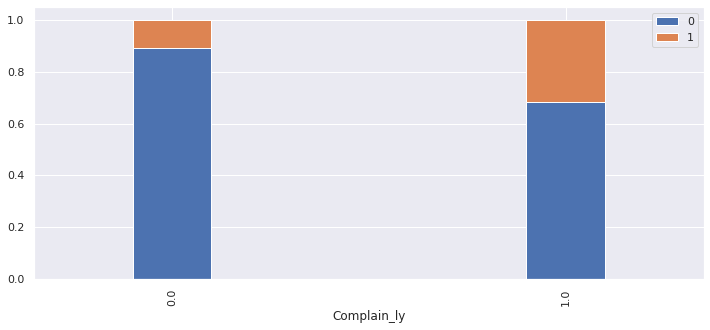

In [43]:
df= churn.groupby('Complain_ly')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(12,5), width=0.2)
plt.legend(loc="Upper Right")

### <font color="Black"><i>The customers with complaints registered have churned significantly more rather than the ones who have never registered any

####   <font color='Red'> <B> Churn vs rev_growth_yoy

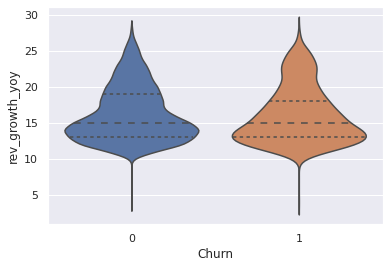

In [44]:
sns.violinplot(churn['Churn'],churn['rev_growth_yoy'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Black"><i>Percentage of Customers with yearly revenue growth above 23 seems to be churning more. 

####   <font color='Red'> <B> Churn vs coupon_used_for_payment

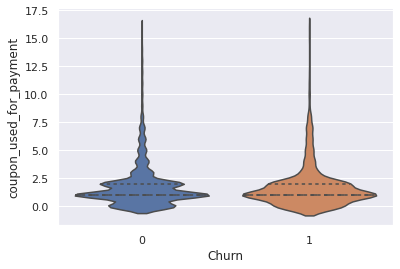

In [45]:
sns.violinplot(churn['Churn'],churn['coupon_used_for_payment'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Black"><i>Percentage of Customers using less no of coupons seems to be churning more.

####   <font color='Red'> <B> Churn vs Day_Since_CC_connect

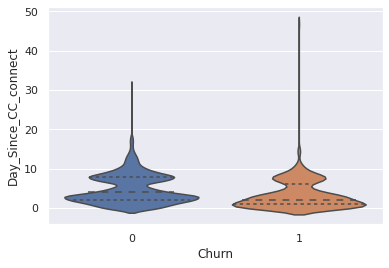

In [46]:
sns.violinplot(churn['Churn'],churn['Day_Since_CC_connect'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Black"><i>Customers who have not contacted with Customer care for longer period seems to be churning more compared to those with frequent connects.

####   <font color='Red'> <B> Churn vs cashback

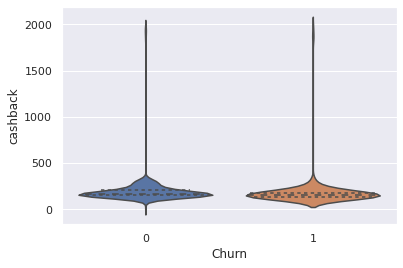

In [47]:
sns.violinplot(churn['Churn'],churn['cashback'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

####   <font color='Red'> <B> Churn vs Login_device

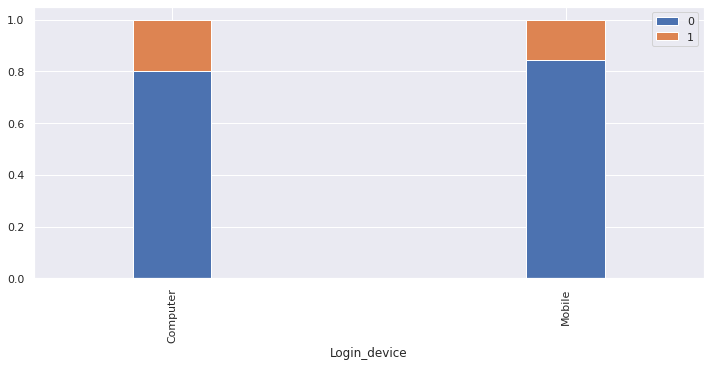

In [48]:
df= churn.groupby('Login_device')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(12,5), width=0.2)
plt.legend(loc="Upper Right")

### <font color="Black"><i>The consumers having logged in via mobile have churned less as per the graph plotted above. Possibly, due to the company providing services for payment, offers, product, customer care assistance solutions in form of an app

### <font color="Green"><i>

####   <font color='Red'> <B> Downloading above cleaned Dataframe for Clustering Purpose to classify customers into various segments

In [49]:
churn.to_csv('Churn For Clustering.csv', index = False)

In [50]:
files.download('Churn For Clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
# Data Models in Python can take only numerical / categorical colums. It cannot take string / object types. 
# Converting object variables into numerical datatypes
for feature in churn.columns: 
    if churn[feature].dtype == 'object': 
        churn[feature] = pd.Categorical(churn[feature]).codes

In [52]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11260 non-null  int8   
 5   Gender                   11260 non-null  int8   
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11260 non-null  int8   
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11260 non-null  int8   
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

####   <font color='Red'> <B>Proportion in the Target classes

In [53]:
churn.Churn.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

### <font color = "Red">  Split into Train-Test Data

In [54]:
X=churn.drop(['Churn'],axis=1)
Y=churn.Churn 

In [55]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,NaN,1
3,0.0,3.0,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1
4,0.0,1.0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1


In [56]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.30)

## Checking the dimensions of the training and test data

In [58]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (7882, 17)
x_test (3378, 17)
y_train (7882,)
y_test (3378,)


In [59]:
x_train_treated=x_train.copy()
x_test_treated=x_test.copy()

### <font color = "Red"><b>3. b) Missing Value treatment (if applicable) 

#### <font color = "Red"><b> KNN Imputation Method to impute missing values 

In [60]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)

In [61]:
cols=x_train_treated.columns

In [62]:
x_train_treated2=pd.DataFrame(imputer.fit_transform(x_train_treated),columns=cols)

In [63]:
x_test_treated2=pd.DataFrame(imputer.transform(x_test_treated),columns=cols)

In [64]:
x_train_treated2.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [65]:
for feature in x_train_treated2.columns:
    if x_train_treated2[feature].dtype == 'object':
        print(feature)
        print(x_train_treated2[feature].unique())
        print('\n')

In [66]:
x_test_treated2.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

### <font color= "Red"> <b> 3.d) Outlier treatment (if required)

### <font color= "Red"><b> From the unvariate analysis performed below features are Categorical Data mostly of Ordinal Type, hence they do not require Outlier Treatment:
##### <font color= "Green">'Service_Score', 

### <font color= "Red"><b>But Below Features require outlier treatment
##### <font color= "Green">'Tenure',<br>'CC_Contacted_LY',<br>'Account_user_count', <br>'rev_per_month',<br>'rev_growth_yoy', <br>'Day_Since_CC_connect','cashback' <br>coupon_used_for_payment'

In [67]:
out_col=['Tenure','CC_Contacted_LY','Account_user_count','rev_per_month','Day_Since_CC_connect','cashback','coupon_used_for_payment']

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

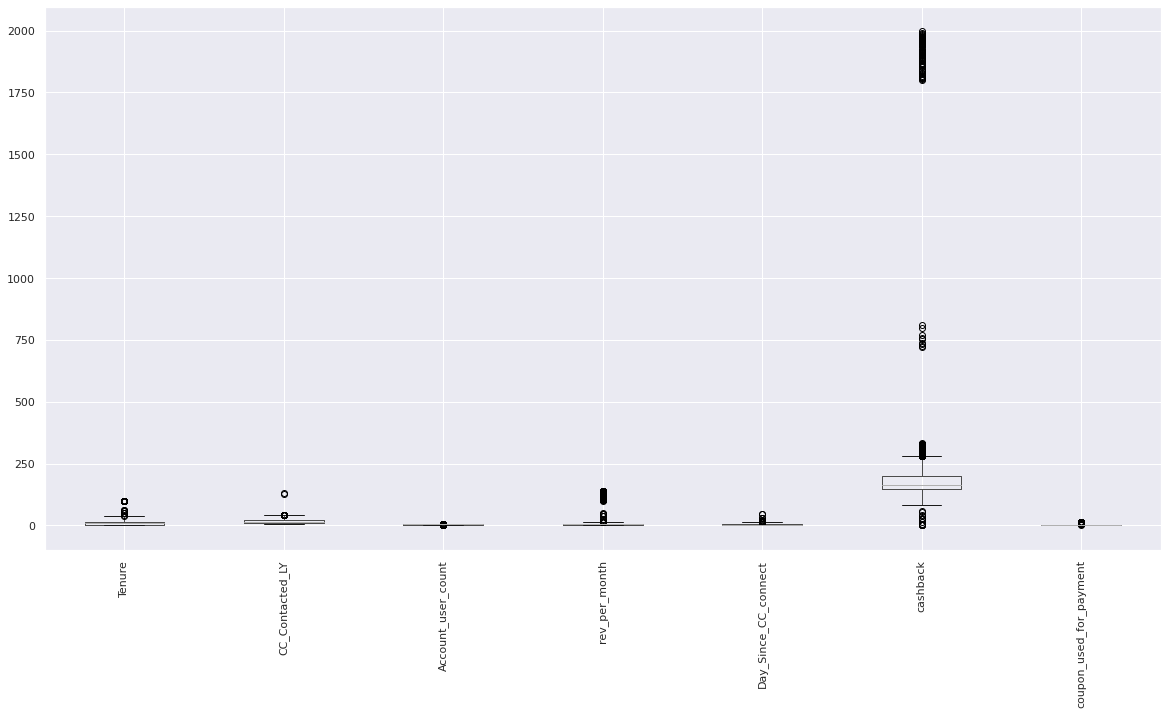

In [68]:
x_train_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

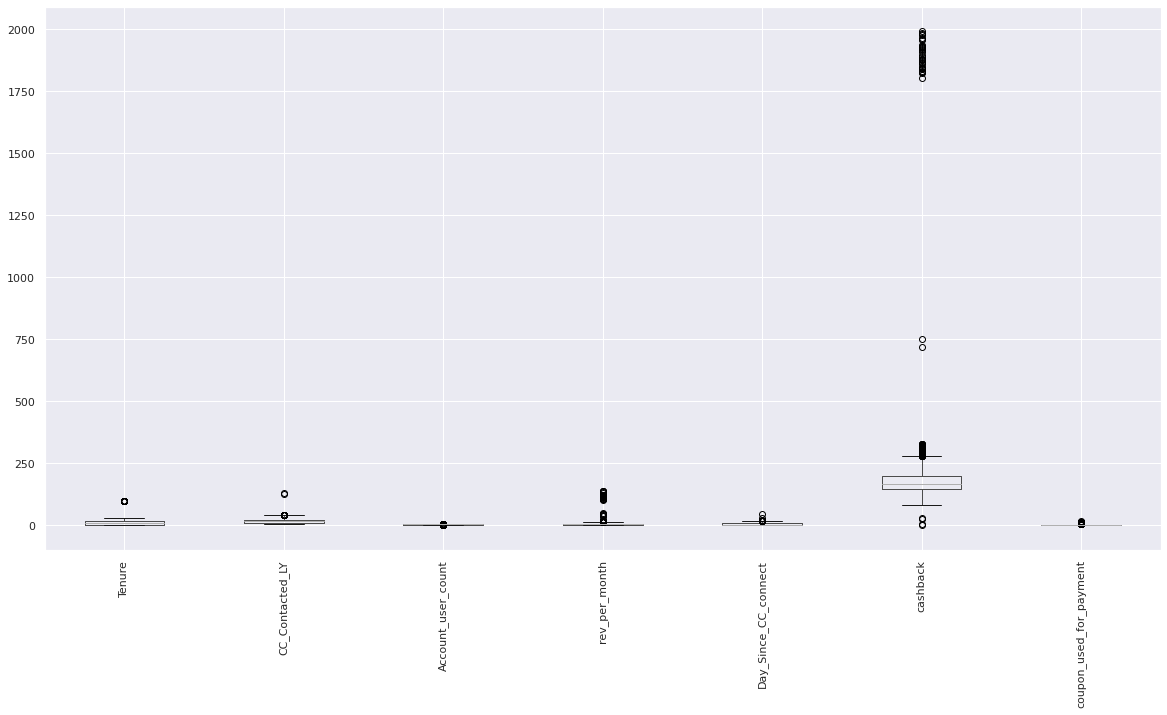

In [69]:
x_test_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

In [70]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.nanpercentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [71]:
for i in range(0,len(out_col)):
  lr,ur=remove_outlier(x_train_treated2[out_col[i]])
  x_train_treated2[out_col[i]]=np.where(x_train_treated2[out_col[i]]>ur,ur,x_train_treated2[out_col[i]])
  x_train_treated2[out_col[i]]=np.where(x_train_treated2[out_col[i]]<lr,lr,x_train_treated2[out_col[i]])
  x_test_treated2[out_col[i]]=np.where(x_test_treated2[out_col[i]]>ur,ur,x_test_treated2[out_col[i]])
  x_test_treated2[out_col[i]]=np.where(x_test_treated2[out_col[i]]<lr,lr,x_test_treated2[out_col[i]])

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

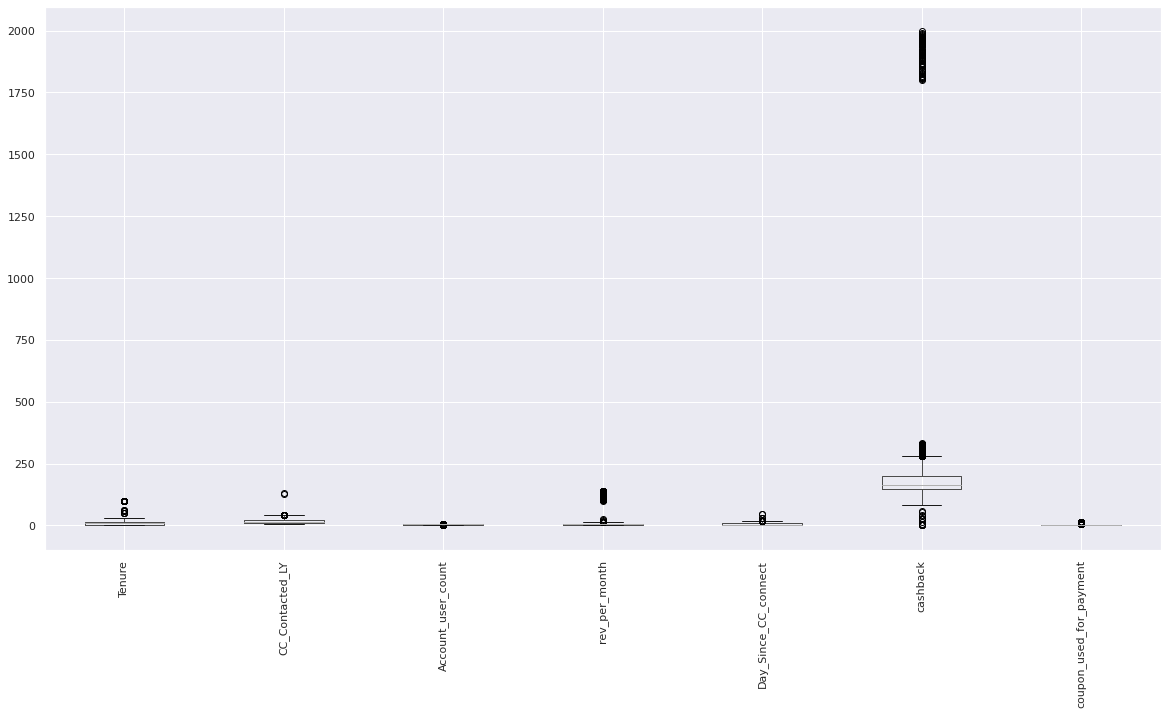

In [72]:
x_train[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

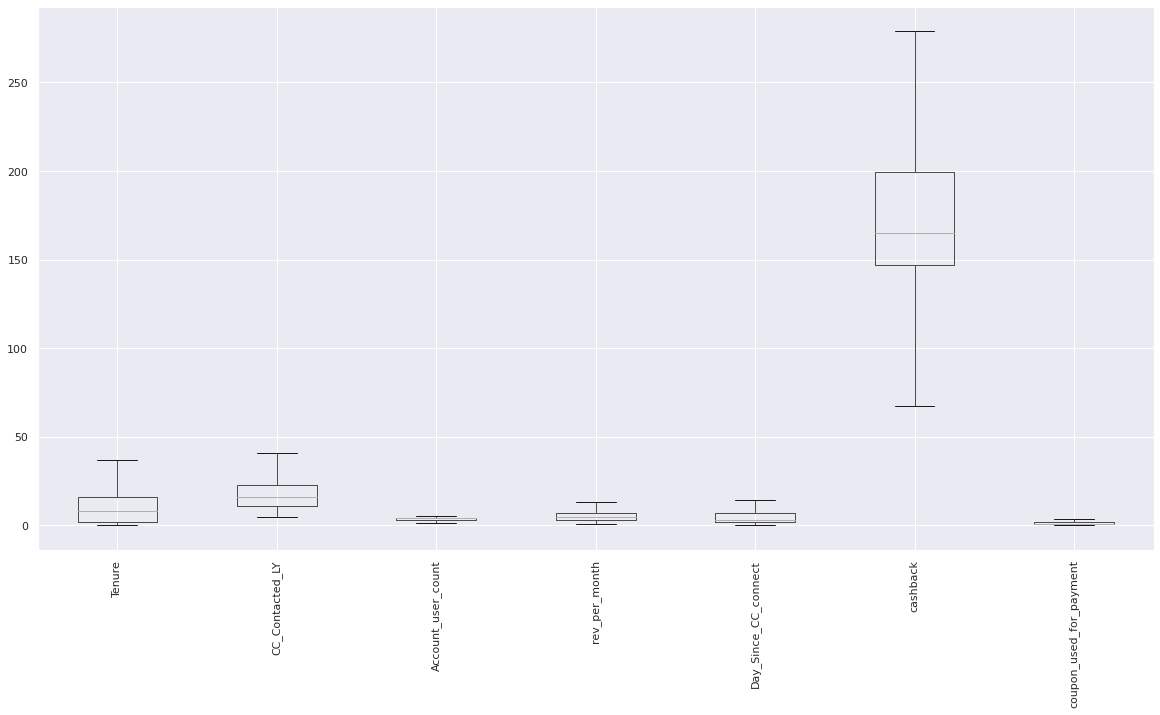

In [73]:
x_train_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

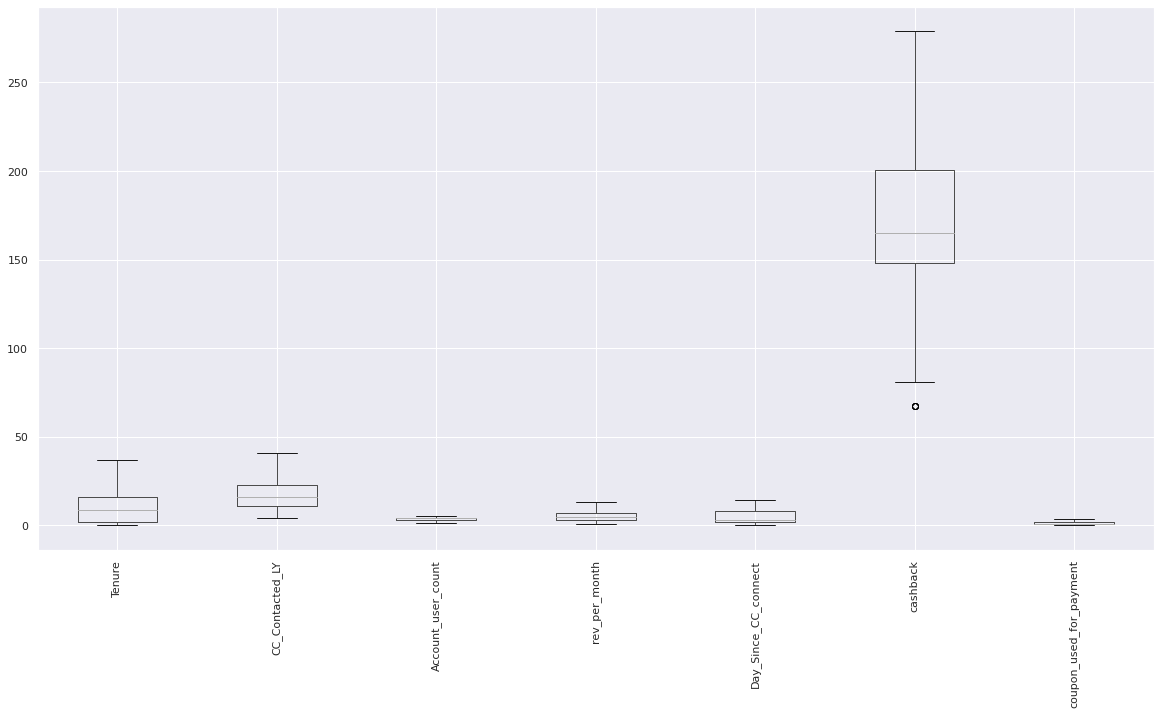

In [74]:
x_test_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

### <font color = "Red"> <b>3.e) Variable transformation (if applicable)

#### <font color = "Red"><b> Standard Scaling the data:

#### <font color = "Black"> -Since features are based on different unit scale (especially revenue features and cashback) , it will be ideal to perform scaling of the data for the preparation of Data Models in future.

#### <font color = "Black"> - It can be noted here that the higher magnitude of some variables will affected the distance between the two points which will impact the performance of distance based model as it will give higher weightage to variables which have higher magnitude.
    
#### <font color = "Black"> - We do not want our algorithm to be affected by the magnitude of these variables and be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale.

#### <font color = "Black"> - Various scaling techniques like Normalization, Min-max, Standard Scaler Technique can be used to scale the data. 

#### <font color = "Sky Blue"> - For this problem I chose to use Standard Scaler from Sklearn Library

In [75]:
sc = StandardScaler() 
x_train_scaled = sc.fit_transform(x_train_treated2) 
x_test_scaled = sc.transform (x_test_treated2)

## <font color = "Red"> <b>4) Business insights from EDA 

### <font color = "Red"> <b>4 a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

### <font color = "Black"> <b><i>The dataset contains information of churning customers (17%) and non-churning customers (83%). Hence, it can be presumed that the data is imbalanced.
### <font color = "Black"> <b><i>Such scenarios do occur in real world as generally the customer who will churn will always be less than those who have not.
### <font color = "Black"> <b><i>Initially, we can try building our model based on the imbalanced proportion and if the model captures all the churning customers, we can continue with our implementation. 
### <font color = "Black"> <b><i>In case the model performs poorly, we can opt for the statistical technique - SMOTE – which creates artificial data points, thereby, to increase the values in the dataset in a balanced way.


### <font color = "Red"> <b>4 b) Any business insights using clustering  (if applicable)

### <font color = "Black"> <b><i>•	People from Tier 3 City seems to be churning the most
### <font color = "Black"> <b><i>•	Customers who had to contact customer service more frequent around 15-25 times seems to be churning, this implies that they were not satisfied with the service provided.
### <font color = "Black"> <b><i>•	Accounts with around 4 users seems to be churning the most, which implies company can think of limiting the number of users per accounts
### <font color = "Black"> <b><i>•	Consumers who have received less coupons seems to be potential churners


### <font color = "Red"> <b>Conclusion:

### <font color = "Black"> <b><i>•	Improvement of infrastructures in Tier 3 cities to provide better customer service.
### <font color = "Black"> <b><i>•	Run offers for the customers especially who are using Regular Plus accounts in terms of more cashback coupons, or add channel counts.
